In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('new_pre.csv')
df

,Unnamed: 0,HAD_ATTACK,HAD_HEARTDIS,HAD_ASTHMA,KIDNEY_DIS,HAD_DIABETES,DIFFWALK,SMOKING100,DRINKSIN_30D,DRINK_FREQ30D,PHYSICH_STATUS,MENTALH_STATUS,HEALTH_INSU,PHYSIC_ACT,SEX,AGE>65,HEAVY_DRINKERS,Adult,WEIGHT_KG
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1,88.450440
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1,80.739376
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,98.429464
3,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,66.224432
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,90.718400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,184074,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,71.667536
184075,184075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,58.966960
184076,184076,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,90.718400
184077,184077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,77.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,58.059776


In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.nunique().reset_index().rename(columns={'index':'column', 0:'unique count'})

,column,unique count
0,HAD_ATTACK,2
1,HAD_HEARTDIS,2
2,HAD_ASTHMA,2
3,KIDNEY_DIS,2
4,HAD_DIABETES,2
5,DIFFWALK,2
6,SMOKING100,2
7,DRINKSIN_30D,49
8,DRINK_FREQ30D,47
9,PHYSICH_STATUS,2


In [7]:
cat_cols2 = [col for col in df.columns if df[col].nunique() < 10]
num_cols2 = [col for col in df.columns if df[col].nunique() >= 10]

print(cat_cols2)
print(num_cols2)

['HAD_ATTACK', 'HAD_HEARTDIS', 'HAD_ASTHMA', 'KIDNEY_DIS', 'HAD_DIABETES', 'DIFFWALK', 'SMOKING100', 'PHYSICH_STATUS', 'MENTALH_STATUS', 'HEALTH_INSU', 'PHYSIC_ACT', 'SEX', 'AGE>65', 'HEAVY_DRINKERS', 'Adult']
['DRINKSIN_30D', 'DRINK_FREQ30D', 'WEIGHT_KG']


In [8]:
df[num_cols2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DRINKSIN_30D,184079.0,2.251609,2.331794,0.0000,1.0000,2.00000,3.00000,76.00000
DRINK_FREQ30D,184079.0,1.898500,8.237418,0.0000,0.0000,0.00000,1.00000,99.00000
WEIGHT_KG,184079.0,83.564694,20.531724,22.6796,68.0388,81.64656,95.25432,285.76296


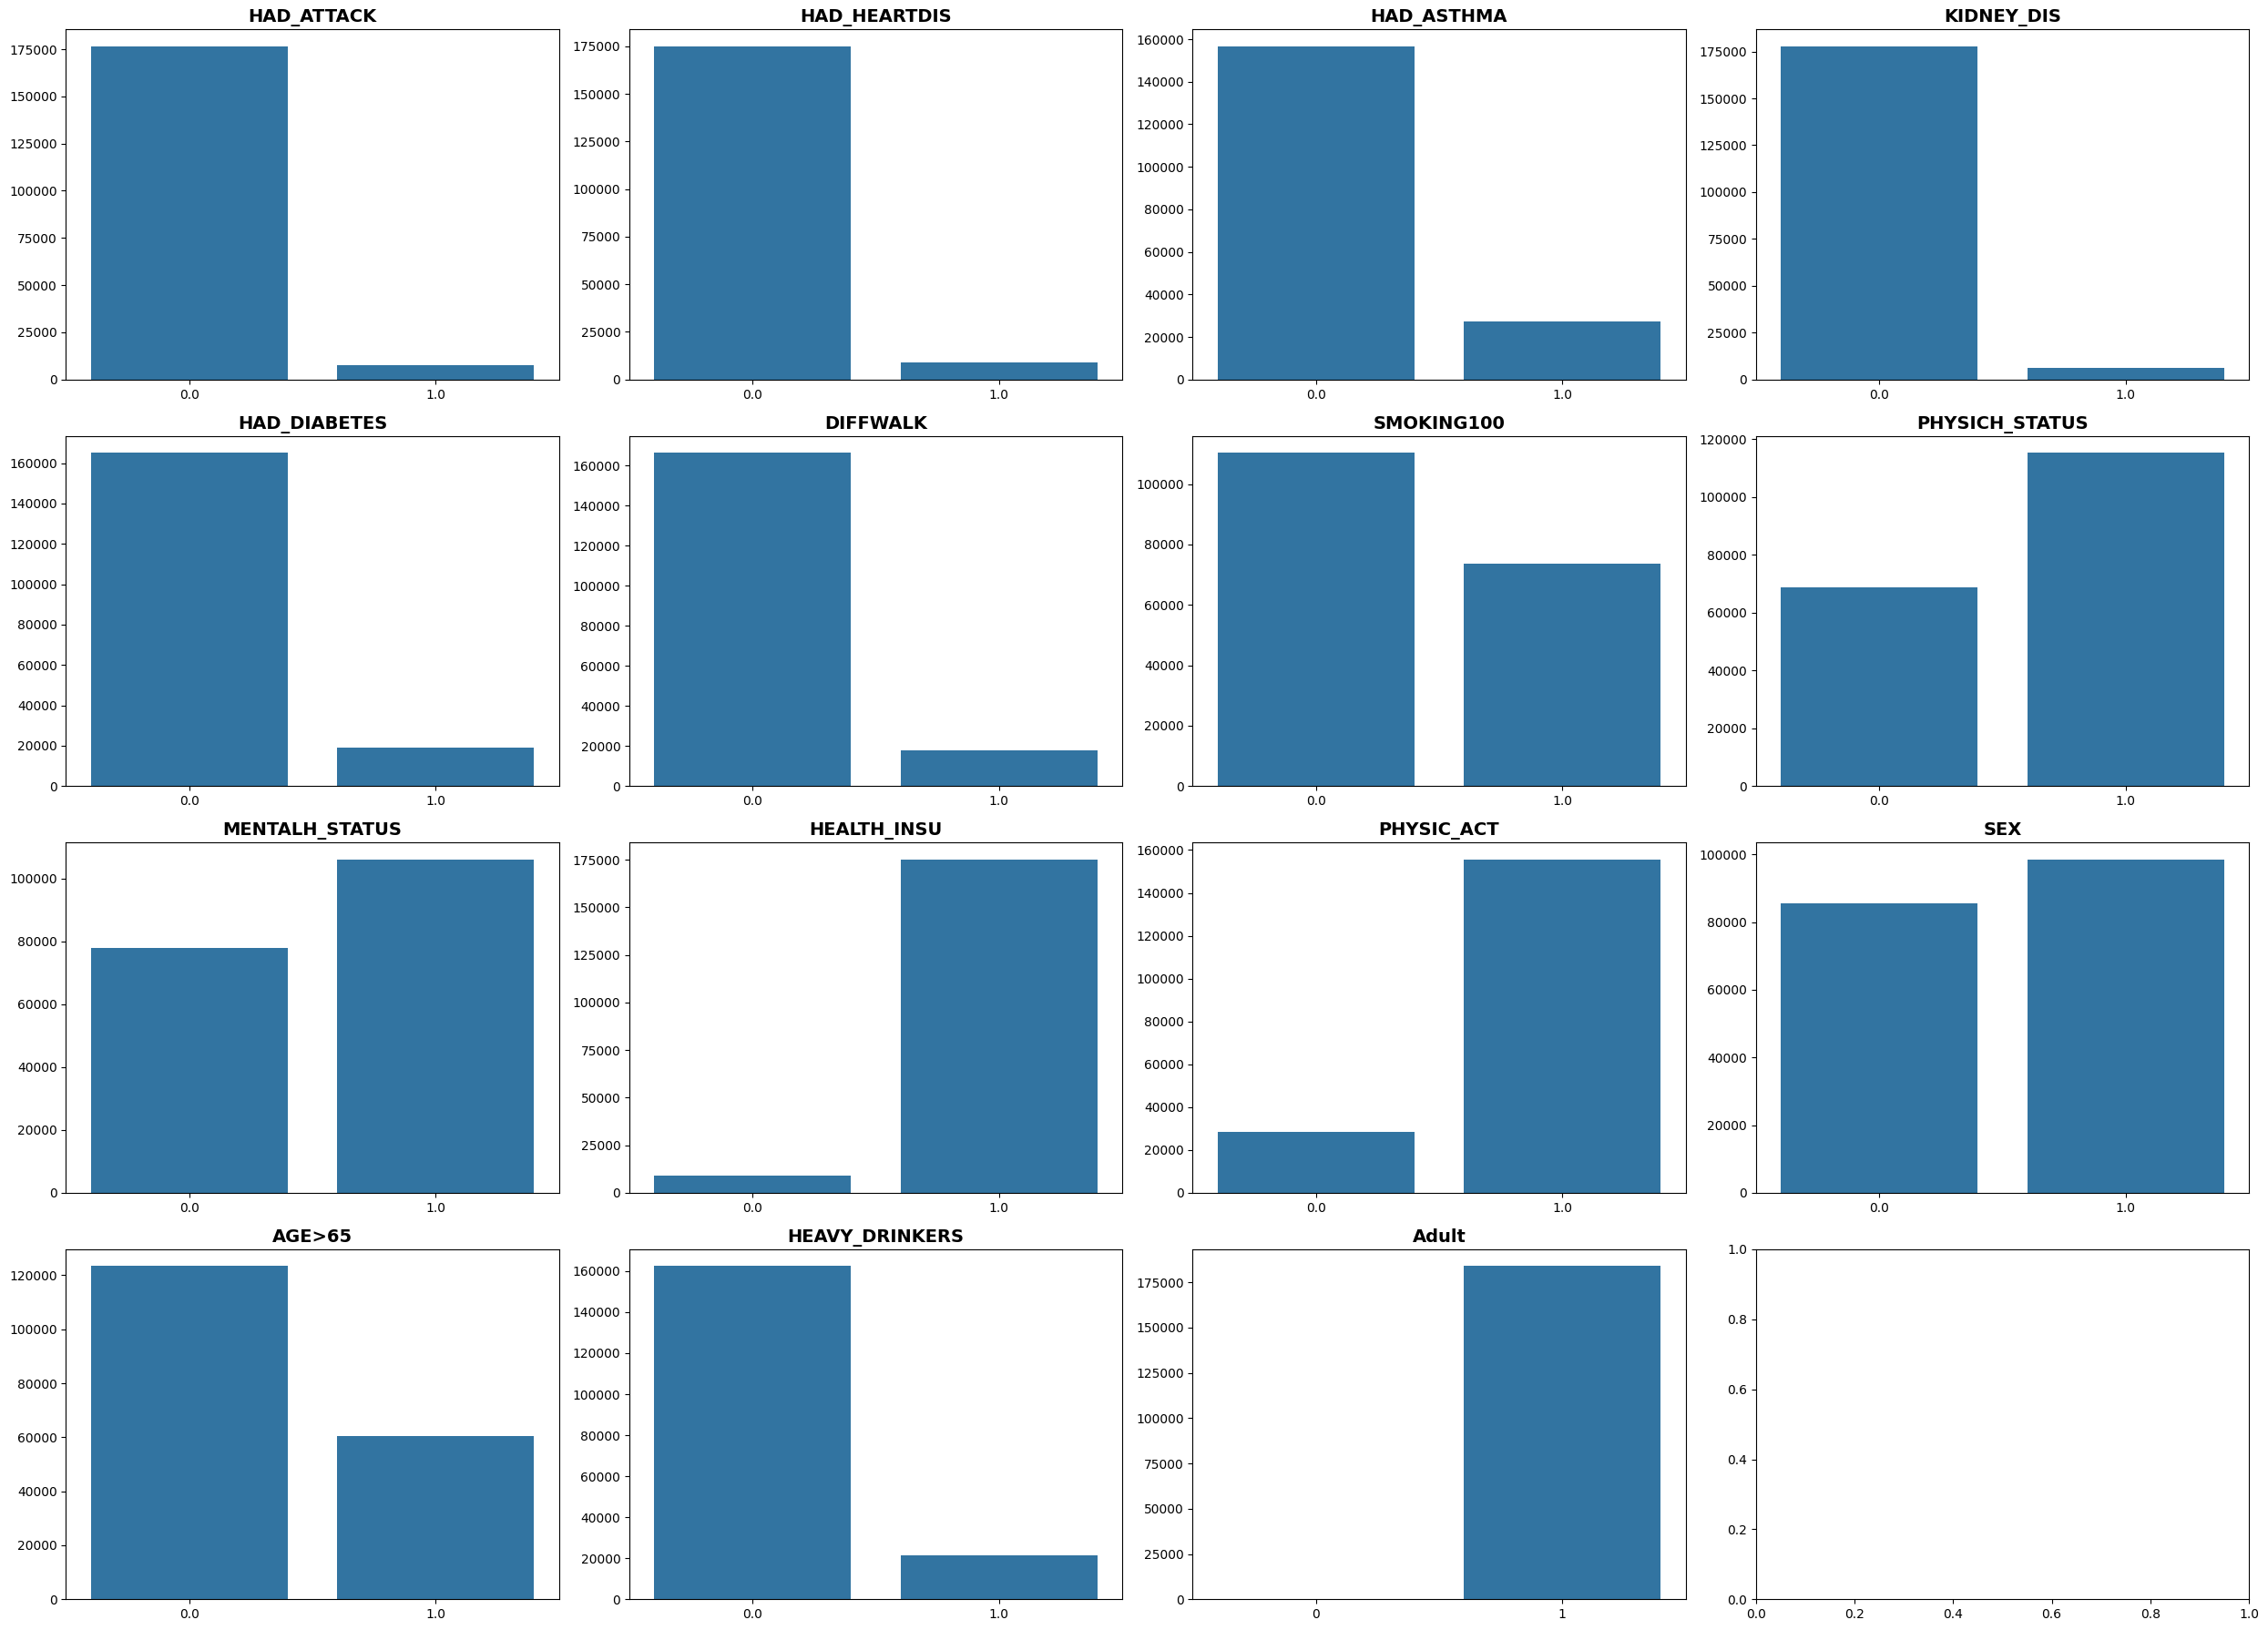

In [9]:


cat_cols = ['HAD_ATTACK','HAD_HEARTDIS','HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
            'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS','HEALTH_INSU',
            'PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS','Adult']

fig, axes = plt.subplots(4,4, figsize=(25,18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


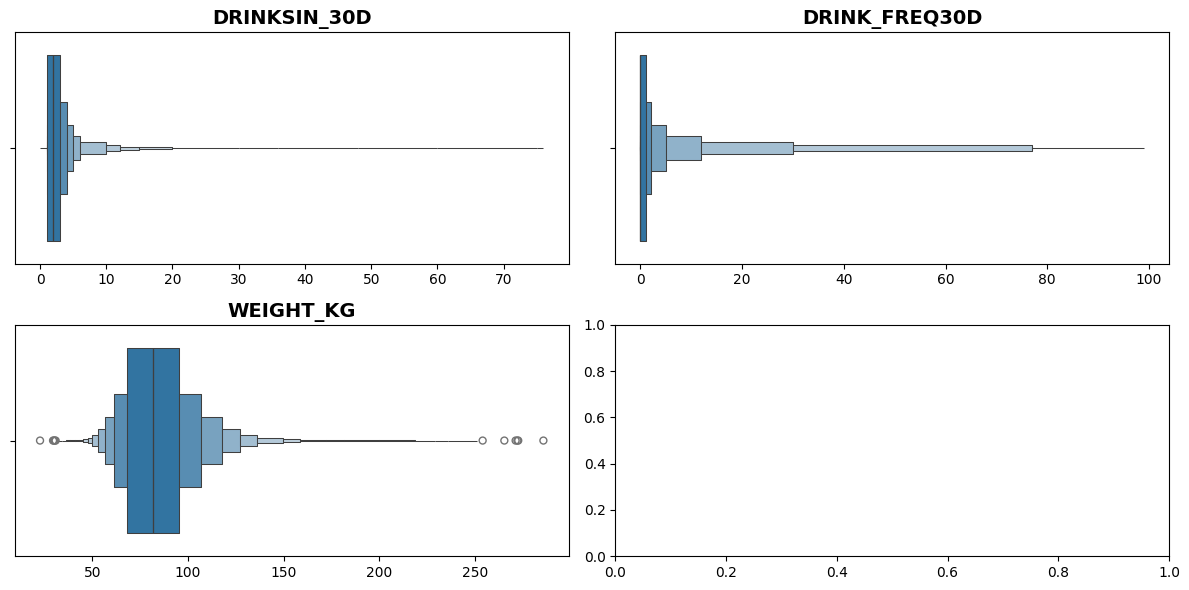

In [10]:


num_cols=['DRINKSIN_30D', 'DRINK_FREQ30D', 'WEIGHT_KG']

fig, axes = plt.subplots(2,2, figsize=(12,6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


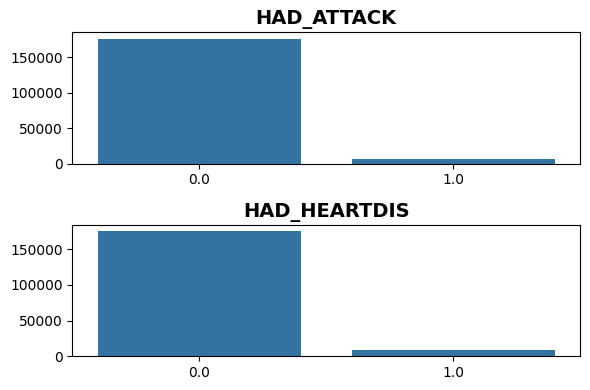

In [11]:


target_column=['HAD_ATTACK','HAD_HEARTDIS']

fig, axes = plt.subplots(2, figsize=(6,4))
axes = axes.flatten()

for i, col in enumerate(target_column):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


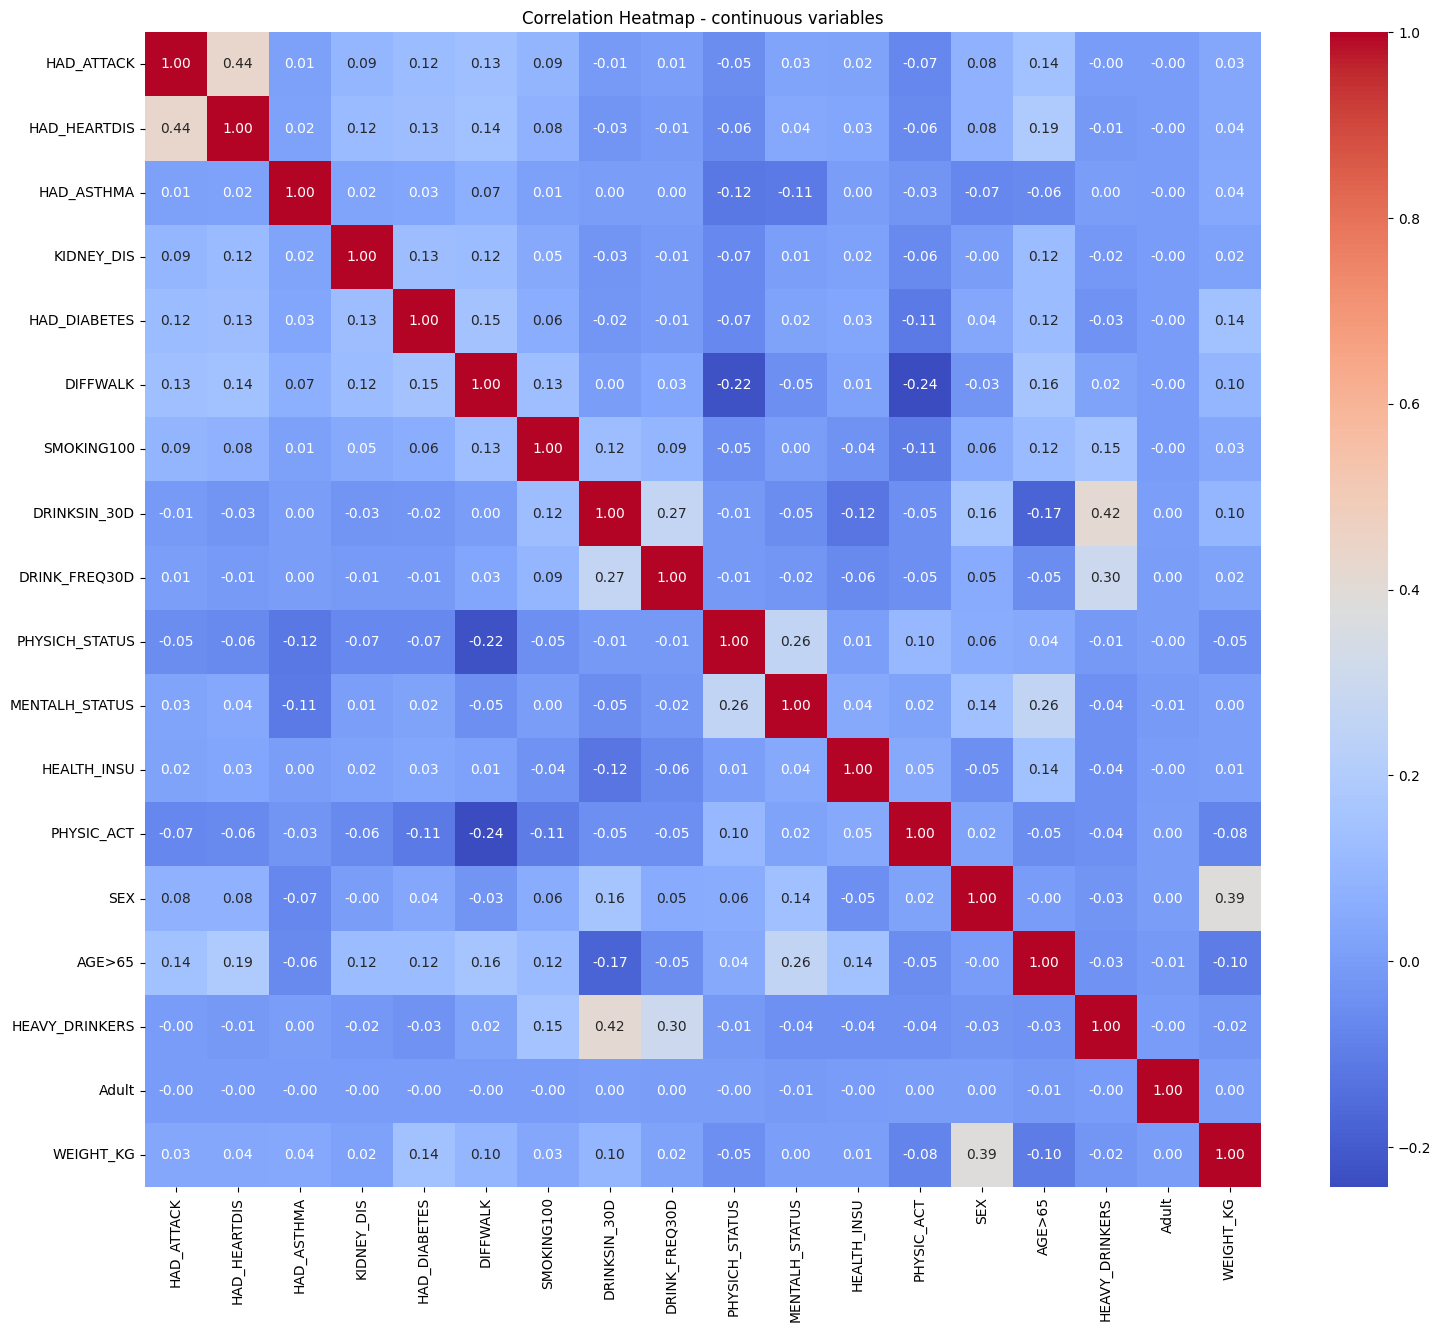

In [12]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - continuous variables")
plt.show()

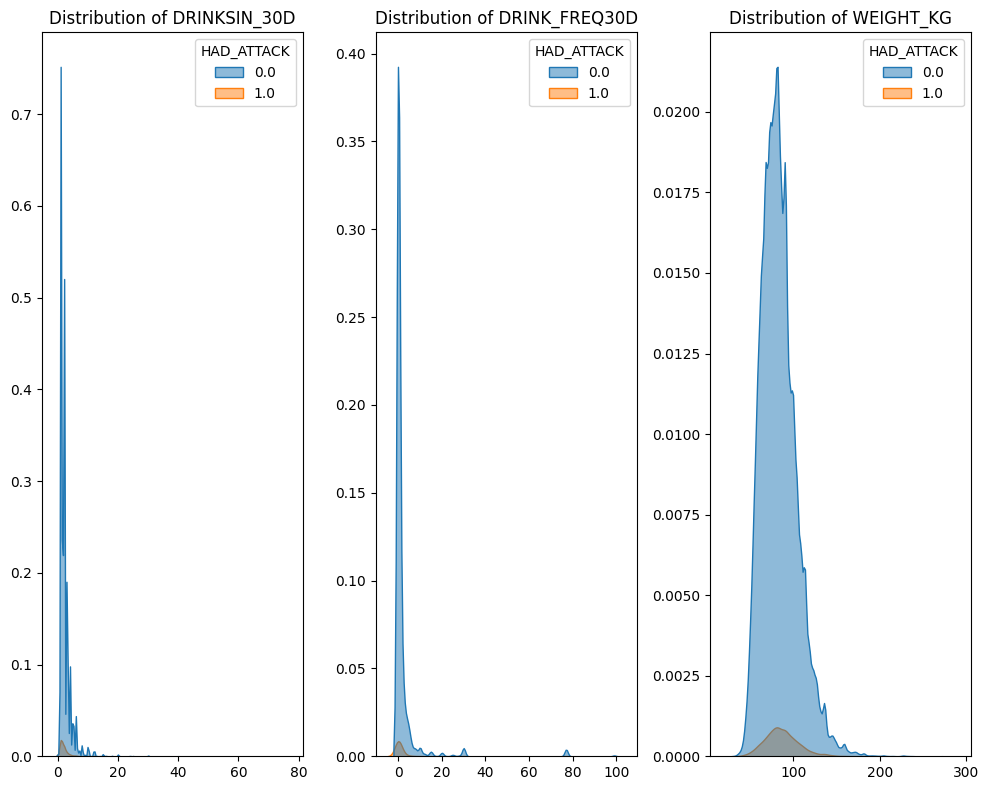

In [13]:


num_cols = ['DRINKSIN_30D','DRINK_FREQ30D','WEIGHT_KG']

plt.figure(figsize=(10,8))

for i,col in enumerate(num_cols):

    plt.subplot(1,3,i+1)
    sns.kdeplot(data=df, x=col, hue='HAD_ATTACK', fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [14]:
X,y = df.drop('HAD_ATTACK', axis=1), df['HAD_ATTACK']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state =42)

In [15]:
features = ['HAD_HEARTDIS'
    'HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
    'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS',
    'HEALTH_INSU','PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS'
]

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

for feat,imp in sorted(zip(features,importances), key=lambda x:x[1], reverse=True):
    print(feat,imp)

HAD_HEARTDISHAD_ASTHMA 0.21540544097145572
MENTALH_STATUS 0.08853903173181275
HEALTH_INSU 0.059697299484402735
SEX 0.028041929899872586
KIDNEY_DIS 0.02448372843059997
PHYSIC_ACT 0.024111040248975143
HEAVY_DRINKERS 0.021123540907056038
SMOKING100 0.019204000234418397
PHYSICH_STATUS 0.01842971078759002
DIFFWALK 0.017795693194562517
HAD_DIABETES 0.015351108964829076
AGE>65 0.006666542336689378


In [17]:
df.drop('HAD_HEARTDIS',axis=1,inplace=True)

In [18]:
features = [
    'HAD_ASTHMA','KIDNEY_DIS','HAD_DIABETES',
    'DIFFWALK','SMOKING100','PHYSICH_STATUS','MENTALH_STATUS',
    'HEALTH_INSU','PHYSIC_ACT','SEX','AGE>65','HEAVY_DRINKERS'
]

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

for feat,imp in sorted(zip(features,importances), key=lambda x:x[1], reverse=True):
    print(feat,imp)

HAD_ASTHMA 0.2124076199190009
MENTALH_STATUS 0.08692374966343941
HEALTH_INSU 0.05864504756689604
SEX 0.027698983726055726
KIDNEY_DIS 0.02418939438255703
PHYSIC_ACT 0.023990381365259335
HEAVY_DRINKERS 0.020398089242508133
SMOKING100 0.0193089584519547
PHYSICH_STATUS 0.018599544448734597
DIFFWALK 0.016794979276422827
HAD_DIABETES 0.015339557290643872
AGE>65 0.007211881186835438


In [20]:
df

,HAD_ATTACK,HAD_ASTHMA,KIDNEY_DIS,HAD_DIABETES,DIFFWALK,SMOKING100,DRINKSIN_30D,DRINK_FREQ30D,PHYSICH_STATUS,MENTALH_STATUS,HEALTH_INSU,PHYSIC_ACT,SEX,AGE>65,HEAVY_DRINKERS,Adult,WEIGHT_KG
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1,88.450440
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1,80.739376
2,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,98.429464
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,66.224432
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,90.718400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,71.667536
184075,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,58.966960
184076,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,90.718400
184077,0.0,0.0,0.0,0.0,0.0,1.0,5.0,77.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,58.059776


In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, accuracy_score

clf = LinearSVC(C=1, class_weight='balanced', max_iter=20000, dual=False)
clf.fit(X_train, y_train)

y_dec = clf.decision_function(X_test)
y_pred = (y_dec >= 0).astype(int)   # threshold 0
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8710343328987397
Recall: 0.6836836836836837


In [23]:
# ============================================
# ⚡ XGBoost Model (Scikit-learn style)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# ===============================
# 📂 1️⃣ Load Dataset
# ===============================
df = pd.read_csv("new_pre.csv")  # Replace with your dataset path
target_col = "HAD_ATTACK"  # Target column (1=Yes, 2=No)


X = df.drop(columns=[target_col])
y = df[target_col]

# ===============================
# 🧹 2️⃣ Preprocessing
# ===============================
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# ===============================
# ✂️ 3️⃣ Split + Balance
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# ===============================
# 🤖 4️⃣ XGBoost Classifier
# ===============================
xgb_model = XGBClassifier(
    n_estimators=300,         # number of trees
    learning_rate=0.05,       # smaller LR for stability
    max_depth=6,              # reasonable depth
    subsample=0.8,            # prevent overfitting
    colsample_bytree=0.8,     # feature sampling
    scale_pos_weight=3,       # handle class imbalance
    reg_lambda=1,             # L2 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist'        # fast CPU mode (use 'gpu_hist' if GPU available)
)

# Train the model
xgb_model.fit(X_res, y_res)

# ===============================
# 📊 5️⃣ Evaluation
# ===============================
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy*100:.2f}%")
print(f"📈 Recall: {recall*100:.2f}%\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 85.33%
📈 Recall: 61.79%

📋 Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     70654
         1.0       0.16      0.62      0.25      2978

    accuracy                           0.85     73632
   macro avg       0.57      0.74      0.59     73632
weighted avg       0.95      0.85      0.89     73632



In [2]:
# ============================================
# 💡 Logistic Regression Model (Scikit-learn)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE

# ===============================
# 📂 1️⃣ Load Dataset
# ===============================
df = pd.read_csv("new_pre.csv")  # change to your dataset name
target_col = "HAD_ATTACK"  # heart attack column (1=Yes, 2=No)

X = df.drop(columns=[target_col])
y = df[target_col]



# ===============================
# ✂️ 3️⃣ Split and Balance
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# ===============================
# 🤖 4️⃣ Logistic Regression
# ===============================
log_reg = LogisticRegression(max_iter=500000, class_weight='balanced', random_state=42)
log_reg.fit(X_res, y_res)

# ===============================
# 📊 5️⃣ Evaluation
# ===============================
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy*100:.2f}%")
print(f"📈 Recall: {recall*100:.2f}%\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


NameError: name 'preprocessor' is not defined

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, roc_auc_score, recall_score, accuracy_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# ===============================
#  Device
# ===============================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ===============================
#  FOCAL LOSS
# ===============================
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=4, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss

# ===============================
#  Train-Test Split + Scaling + SMOTE

# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sm = SMOTE(sampling_strategy=0.5, random_state=42)  # or their chosen ratio
X_sm, y_sm = sm.fit_resample(X_scaled, y)



X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm
)




# ===============================
#  Tensors
# ===============================
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long).to(device)

# ===============================
#  Model Architecture
# ===============================
class ImprovedMLP_Recall(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedMLP_Recall, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.25)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.2)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.15)
        )
        self.output = nn.Linear(64, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.output(x)

# ===============================
# Loss + Optimizer + Scheduler
# ===============================
model = ImprovedMLP_Recall(X_train.shape[1]).to(device)
criterion = FocalLoss(alpha=2.5, gamma=2)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

# ===============================
#  Training Loop with Early Stopping
# ===============================
best_loss = float('inf')
patience = 5
trigger = 0
epochs = 300

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step()  # ✅ no argument here

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), "best_model.pt")
        trigger = 0
    else:
        trigger += 1
        if trigger >= patience:
            print("Early stopping triggered!")
            break

# ===============================
#  Evaluation + Threshold Tuning
# ===============================
model.load_state_dict(torch.load("best_model.pt"))
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    probs = torch.softmax(logits, dim=1)[:,1].cpu().numpy()

from sklearn.metrics import fbeta_score

threshold = 0.33

y_test_np = y_test_tensor.cpu().numpy()     # <--- important
final_preds = (probs > threshold).astype(int)

print(classification_report(y_test_np, final_preds, digits=3))
print("ROC-AUC:", roc_auc_score(y_test_np, probs))
print("Recall:", recall_score(y_test_np, final_preds))
print("Precision:", precision_score(y_test_np, final_preds))
print("Accuracy:", accuracy_score(y_test_np, final_preds))

Using device: cuda
Epoch 1/300, Loss: 0.4450
Epoch 2/300, Loss: 0.3218
Epoch 3/300, Loss: 0.2939
Epoch 4/300, Loss: 0.2867
Epoch 5/300, Loss: 0.2853
Epoch 6/300, Loss: 0.2851
Epoch 7/300, Loss: 0.2837
Epoch 8/300, Loss: 0.2821
Epoch 9/300, Loss: 0.2803
Epoch 10/300, Loss: 0.2789
Epoch 11/300, Loss: 0.2780
Epoch 12/300, Loss: 0.2779
Epoch 13/300, Loss: 0.2767
Epoch 14/300, Loss: 0.2765
Epoch 15/300, Loss: 0.2762
Epoch 16/300, Loss: 0.2753
Epoch 17/300, Loss: 0.2744
Epoch 18/300, Loss: 0.2737
Epoch 19/300, Loss: 0.2733
Epoch 20/300, Loss: 0.2732
Epoch 21/300, Loss: 0.2735
Epoch 22/300, Loss: 0.2732
Epoch 23/300, Loss: 0.2728
Epoch 24/300, Loss: 0.2725
Epoch 25/300, Loss: 0.2719
Epoch 26/300, Loss: 0.2716
Epoch 27/300, Loss: 0.2715
Epoch 28/300, Loss: 0.2714
Epoch 29/300, Loss: 0.2711
Epoch 30/300, Loss: 0.2711
Epoch 31/300, Loss: 0.2707
Epoch 32/300, Loss: 0.2708
Epoch 33/300, Loss: 0.2706
Epoch 34/300, Loss: 0.2703
Epoch 35/300, Loss: 0.2698
Epoch 36/300, Loss: 0.2701
Epoch 37/300, Loss

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier


X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

param_grid = {
    'learning_rate_init': [0.0005, 0.001,1e-3],
    'hidden_layer_sizes': [(64,), (128,),(512,)],
    'alpha': [0.0001, 0.001,1,2,3]
}

grid = GridSearchCV(
    MLPClassifier(max_iter=150),
    param_grid,
    cv=2,
    n_jobs=1
)

grid.fit(X_small, y_small)   # <<< only 10% data
print(grid.best_params_)


c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the opti

{'alpha': 0.0001, 'hidden_layer_sizes': (512,), 'learning_rate_init': 0.001}


c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
for t in [0.10,0.15,0.20,0.25,0.30,0.5,0.4,0.35,0.33,0.37]:
    y_pred_t = (probs > t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    a = accuracy_score(y_test,y_pred_t)
    print("threshold", t , "precision:", p, " recall:",r, "Accuracy:",a)

threshold 0.1 precision: 0.3333459150357635  recall: 1.0 Accuracy: 0.333383657293829
threshold 0.15 precision: 0.33338995847489616  recall: 1.0 Accuracy: 0.3335157576901302
threshold 0.2 precision: 0.3361885183493224  recall: 0.9999433844760234 Accuracy: 0.341856954142291
threshold 0.25 precision: 0.3698352344740177  recall: 0.9912245937836155 Accuracy: 0.4341007737308926
threshold 0.3 precision: 0.42895273587993854  recall: 0.9644454509426484 Accuracy: 0.5601811662577845
threshold 0.5 precision: 0.8255874286561411  recall: 0.6305837060521995 Accuracy: 0.8324589545197207
threshold 0.4 precision: 0.6210910944935418  recall: 0.8276057294910264 Accuracy: 0.7742404227212681
threshold 0.35 precision: 0.5150063856960408  recall: 0.9132084017437582 Accuracy: 0.6844121532364598
threshold 0.33 precision: 0.479257990536186  recall: 0.9346656853309178 Accuracy: 0.6397056048311002
threshold 0.37 precision: 0.5552113378200335  recall: 0.8827492498443074 Accuracy: 0.7251934327231553


In [27]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report,recall_score



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for MLP performance): 
# It normalizes features for faster and more stable training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("before:", y.value_counts())
print("after :", pd.Series(y_train_resampled).value_counts())

# Define the MLP model
# hidden_layer_sizes=(10, 5): Two hidden layers with 10 and 5 neurons
# Uses the ReLU activation function.
# solver='adam': Optimization algorithm (a variant of gradient descent)
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu',
                    solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

before: HAD_ATTACK
0.0    176633
1.0      7446
Name: count, dtype: int64
after : HAD_ATTACK
0.0    123655
1.0    123655
Name: count, dtype: int64
Accuracy: 0.8665435317977691
Recall: 0.6602849510240427

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     52978
         1.0       0.18      0.66      0.29      2246

    accuracy                           0.87     55224
   macro avg       0.58      0.77      0.61     55224
weighted avg       0.95      0.87      0.90     55224



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report
import pandas as pd
import numpy as np

# ===============================
# ⚙️ Setup
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===============================
# 📊 Load Dataset
# ===============================
df = pd.read_csv("finalpre.csv")
target_col = "HAD_ATTACK"

X = df.drop(columns=[target_col])
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", np.bincount(y_train_res.astype(int)))

# Convert to tensor
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res.values.astype(int), dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values.astype(int), dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)

# ===============================
# 🧠 Model Definition
# ===============================
class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 1)
        )

    def forward(self, x):
        weights = torch.softmax(self.attn(x), dim=1)
        context = torch.sum(weights * x, dim=1)
        return context

class MLPWithAttention(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = AttentionLayer(input_dim)
        self.net = nn.Sequential(
            nn.Linear(input_dim + input_dim, 256),  # concat input + context
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        context = self.attn(x)
        out = torch.cat([x, context.unsqueeze(1).repeat(1, x.shape[1])], dim=1)
        return self.net(out)

model = MLPWithAttention(X_train_scaled.shape[1]).to(device)

# ===============================
# ⚙️ Training Setup
# ===============================
# Weight classes to handle imbalance
class_weights = torch.tensor([1.0, 3.0], dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
epochs = 200

# ===============================
# 🚀 Training Loop
# ===============================
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# ===============================
# 🧾 Evaluation
# ===============================
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(torch.argmax(preds, dim=1).cpu().numpy())

acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"\n✅ Accuracy: {acc*100:.2f}%")
print(f"📈 Recall: {recall*100:.2f}%")
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred))


Using device: cuda
After SMOTE: [141306  98914]
Epoch 1/200, Loss: 0.4230
Epoch 2/200, Loss: 0.4111
Epoch 3/200, Loss: 0.4014
Epoch 4/200, Loss: 0.3928
Epoch 5/200, Loss: 0.3843
Epoch 6/200, Loss: 0.3775
Epoch 7/200, Loss: 0.3708
Epoch 8/200, Loss: 0.3643
Epoch 9/200, Loss: 0.3589
Epoch 10/200, Loss: 0.3552
Epoch 11/200, Loss: 0.3506
Epoch 12/200, Loss: 0.3459
Epoch 13/200, Loss: 0.3426
Epoch 14/200, Loss: 0.3381
Epoch 15/200, Loss: 0.3352
Epoch 16/200, Loss: 0.3320
Epoch 17/200, Loss: 0.3298
Epoch 18/200, Loss: 0.3276
Epoch 19/200, Loss: 0.3245
Epoch 20/200, Loss: 0.3223
Epoch 21/200, Loss: 0.3207
Epoch 22/200, Loss: 0.3183
Epoch 23/200, Loss: 0.3164
Epoch 24/200, Loss: 0.3145
Epoch 25/200, Loss: 0.3122
Epoch 26/200, Loss: 0.3109
Epoch 27/200, Loss: 0.3105
Epoch 28/200, Loss: 0.3074
Epoch 29/200, Loss: 0.3059
Epoch 30/200, Loss: 0.3048
Epoch 31/200, Loss: 0.3032
Epoch 32/200, Loss: 0.3023
Epoch 33/200, Loss: 0.3010
Epoch 34/200, Loss: 0.3009
Epoch 35/200, Loss: 0.2989
Epoch 36/200, Lo

KeyboardInterrupt: 

In [ ]:
#diff arc


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ---------- FocalLoss (option to accept class weights) ----------
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        """
        alpha: None (no weighting), scalar, or tensor of shape [num_classes] for per-class weights
        gamma: focusing parameter
        """
        super().__init__()
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')
        if alpha is not None:
            if not isinstance(alpha, torch.Tensor):
                alpha = torch.tensor([alpha, 1.0])  # example if scalar -> treat as weight for class0
            self.register_buffer('alpha', alpha)
        else:
            self.alpha = None

    def forward(self, inputs, targets):
        # inputs: logits [N, C], targets: long [N]
        ce_loss = self.ce(inputs, targets)                 # [N]
        pt = torch.exp(-ce_loss)                           # [N]
        focal = (1 - pt) ** self.gamma * ce_loss           # [N]
        if self.alpha is not None:
            # gather per-sample alpha
            a = self.alpha[targets]                        # [N]
            focal = a * focal
        if self.reduction == 'mean':
            return focal.mean()
        elif self.reduction == 'sum':
            return focal.sum()
        else:
            return focal

# ---------- Split first (no leakage) ----------
# X, y assumed to be numpy or pandas prior to this
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# split train into train+val for early stopping / threshold tuning
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

# ---------- Scale: fit on train only ----------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# ---------- SMOTE only on training set ----------
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ---------- To tensors (send to device) ----------
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res.astype(int), dtype=torch.long).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.to_numpy().astype(int), dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy().astype(int), dtype=torch.long).to(device)


# ---------- Model (same as yours) ----------
class ImprovedMLP_Recall(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(input_dim, 512), nn.BatchNorm1d(512),
                                    nn.LeakyReLU(0.1), nn.Dropout(0.3))
        self.layer2 = nn.Sequential(nn.Linear(512, 256), nn.BatchNorm1d(256),
                                    nn.LeakyReLU(0.1), nn.Dropout(0.25))
        self.layer3 = nn.Sequential(nn.Linear(256, 128), nn.BatchNorm1d(128),
                                    nn.LeakyReLU(0.1), nn.Dropout(0.2))
        self.layer4 = nn.Sequential(nn.Linear(128, 64), nn.LeakyReLU(0.1), nn.Dropout(0.15))
        self.output = nn.Linear(64, 2)

    def forward(self, x):
        x = self.layer1(x); x = self.layer2(x); x = self.layer3(x); x = self.layer4(x)
        return self.output(x)

model = ImprovedMLP_Recall(X_train_tensor.shape[1]).to(device)

# If you want class-wise alpha for focal loss compute class weights from training set
from sklearn.utils.class_weight import compute_class_weight
cw = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
alpha_tensor = torch.tensor(cw, dtype=torch.float32).to(device)  # e.g. [w_class0, w_class1]

criterion = FocalLoss(alpha=alpha_tensor, gamma=2.0).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)



from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors (if not already done)
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res.to_numpy().astype(int), dtype=torch.long).to(device)

# Create a TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True) 

# ---------- Training with validation + early stopping ----------
best_val_loss = float('inf')
patience = 10
trigger = 0
epochs = 200

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    # validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val_tensor)
        val_loss = criterion(val_logits, y_val_tensor).item()

    print(f"Epoch {epoch+1}/{epochs} - train_loss: {loss.item():.4f} - val_loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")
        trigger = 0
    else:
        trigger += 1
        if trigger >= patience:
            print("Early stopping triggered.")
            break

# ---------- Load best model, predict on test ----------
model.load_state_dict(torch.load("best_model.pt"))
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.softmax(test_logits, dim=1)[:, 1].cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# ---------- Threshold tuning on validation set ----------
# get val probs first
model.eval()
with torch.no_grad():
    val_probs = torch.softmax(model(X_val_tensor), dim=1)[:,1].cpu().numpy()
    y_val_np = y_val_tensor.cpu().numpy()

prec, rec, thresh = precision_recall_curve(y_val_np, val_probs)
# choose threshold that maximizes F1 or Fbeta; example: F1
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresh[best_idx] if best_idx < len(thresh) else 0.5
print("Selected threshold (val F1 max):", best_thresh)

# Evaluate on test with chosen threshold
final_preds = (test_probs > best_thresh).astype(int)

print(classification_report(y_test_np, final_preds, digits=4))
print("ROC-AUC:", roc_auc_score(y_test_np, test_probs))
print("Recall:", recall_score(y_test_np, final_preds))
print("Precision:", precision_score(y_test_np, final_preds))
print("Accuracy:", accuracy_score(y_test_np, final_preds))



Using device: cuda
Epoch 1/200, Loss: 0.1173
Epoch 1/200 - train_loss: 0.1240 - val_loss: 0.0892
Epoch 2/200, Loss: 0.1138
Epoch 2/200 - train_loss: 0.1061 - val_loss: 0.0910
Epoch 3/200, Loss: 0.1116
Epoch 3/200 - train_loss: 0.1110 - val_loss: 0.0946
Epoch 4/200, Loss: 0.1102
Epoch 4/200 - train_loss: 0.1115 - val_loss: 0.0887
Epoch 5/200, Loss: 0.1089
Epoch 5/200 - train_loss: 0.1011 - val_loss: 0.0822
Epoch 6/200, Loss: 0.1076
Epoch 6/200 - train_loss: 0.1229 - val_loss: 0.0881
Epoch 7/200, Loss: 0.1065
Epoch 7/200 - train_loss: 0.1241 - val_loss: 0.0830
Epoch 8/200, Loss: 0.1052
Epoch 8/200 - train_loss: 0.1120 - val_loss: 0.0867
Epoch 9/200, Loss: 0.1038
Epoch 9/200 - train_loss: 0.0784 - val_loss: 0.0820
Epoch 10/200, Loss: 0.1031
Epoch 10/200 - train_loss: 0.1356 - val_loss: 0.0851
Epoch 11/200, Loss: 0.1023
Epoch 11/200 - train_loss: 0.1001 - val_loss: 0.0843
Epoch 12/200, Loss: 0.1014
Epoch 12/200 - train_loss: 0.1064 - val_loss: 0.0802
Epoch 13/200, Loss: 0.1007
Epoch 13/200